# Voting Classification with Moons Dataset

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
x, y = make_moons(n_samples=400, 
                  noise=0.3, 
                  random_state=42)

<Axes: >

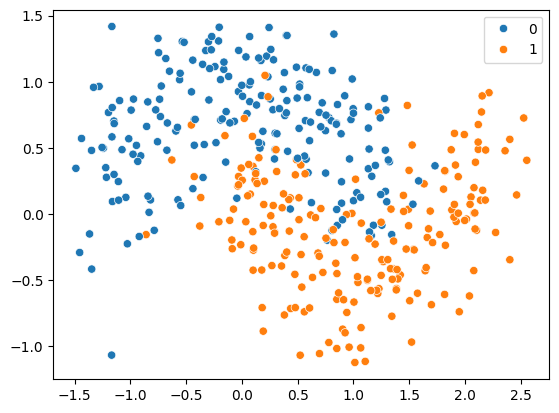

In [7]:
sns.scatterplot(x=x[:,0], 
                y=x[:,1],
                hue=y)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    random_state=0)

## VotingClassifier

In [9]:
knn_clf = KNeighborsClassifier()
logreg_clf = LogisticRegression()
tree_clf = DecisionTreeClassifier()

In [10]:
voting_clf = VotingClassifier(
    estimators=[('lr', logreg_clf), ('knn', knn_clf), ('tr', tree_clf)],
    voting='hard')

In [11]:
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('tr', DecisionTreeClassifier())])

In [12]:
classifiers = [knn_clf, logreg_clf, tree_clf, voting_clf]

In [13]:
for clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.83
LogisticRegression 0.75
DecisionTreeClassifier 0.84
VotingClassifier 0.84


In [14]:
votingsoft_clf = VotingClassifier(
    estimators=[('lr', logreg_clf), ('knn', knn_clf), ('tr', tree_clf)],
    voting='soft')

votingsoft_clf.fit(x_train, y_train)

classifiers = [knn_clf, logreg_clf, tree_clf, voting_clf, votingsoft_clf]

for clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.83
LogisticRegression 0.75
DecisionTreeClassifier 0.84
VotingClassifier 0.84
VotingClassifier 0.85


In [15]:
import ipywidgets

In [16]:
# plot the decision boundary with the data

def bndplot(clf):
    DecisionBoundaryDisplay.from_estimator(clf, 
                                           x, 
                                           response_method="predict",
                                           cmap="RdBu", 
                                           alpha=0.5
    )

    sns.scatterplot(x=x[:,0], 
                    y=x[:,1],
                    hue=y,
                    palette=['red','green'])

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
ipywidgets.interactive(bndplot,clf=classifiers)

interactive(children=(Dropdown(description='clf', options=(KNeighborsClassifier(), LogisticRegression(), Decis…

---
.... to be continued ....